<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/01.7-Extend_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

References:
* https://qiskit.org/documentation/stubs/qiskit.extensions.Initialize.html
* https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Arbitrary-initialization
* https://youtu.be/3ja8uCqUS0s
* https://youtu.be/tOWV94-ydL4



In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN)

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/QC


## Extending Quantum Circuits


### qc.initialize(...)
Initializes the state of the qubits according to the value passed as arguments.

It can be used in conjunction with Statevector() to initialize

It is NOT a gate, as it resets the qubit states.

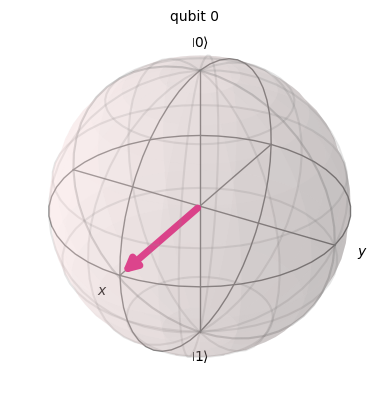

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1)

state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
qc.initialize(state, normalize=False)
sv = Statevector.from_instruction(qc)

qc.draw()
plot_bloch_multivector(sv)

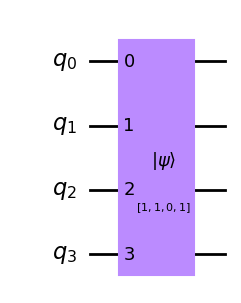

In [ ]:
#Another way to initialize, using a bitstring...
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(4)

qc.initialize("1101") #Note the initialization goes top to bottom in the diagram
sv=Statevector.from_instruction(qc)

display(qc.draw())


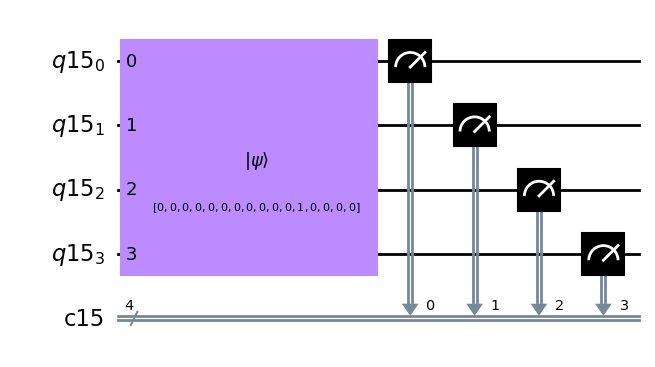

{'1011': 1000}


In [ ]:
#Another way to initialize, using the integer representation...
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr,cr)

#The next 2 sv_ini are equivalent...
#sv_ini = Statevector.from_label("1101")
sv_ini = Statevector.from_int(11, 2**4)

qc.initialize(sv_ini) #Note the initialization goes top to bottom in the diagram
sv=Statevector.from_instruction(qc)

qc.measure(qr, cr)
display(qc.draw())

prov = IBMProvider(instance="ibm-q/open/main")
be = prov.get_backend("ibmq_qasm_simulator")
job = be.run(qc, shots=1000)
results = job.result()
print(results.get_counts())

### Combining Quantum Circuits
* using python "&" or "&=" operator (circuits with the same number of qubits)
* using the QuantumCircuit compose() method (circuits with different number of qubits)

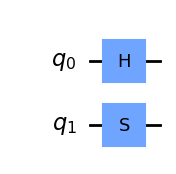

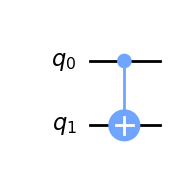

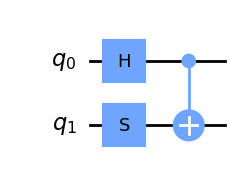

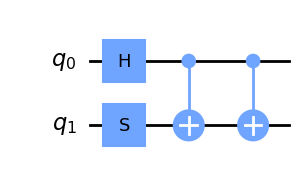

In [ ]:
from qiskit import QuantumCircuit

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.s(1)
display(qc1.draw())

qc2 = QuantumCircuit(2)
qc2.cx(0,1)
display(qc2.draw())

new_qc = qc1 & qc2 #combining two circuits - the operator "+" no longer works
display(new_qc.draw())

new_qc &= qc2
display(new_qc.draw())

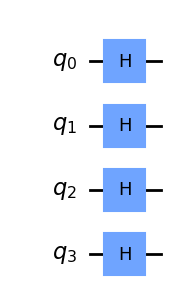

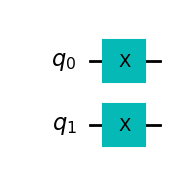

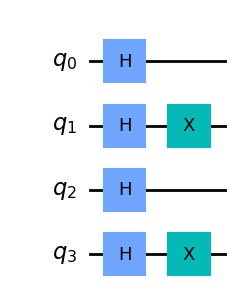

In [ ]:
# Using the compose() method
# Useful when quantum circuits have different number of qubits

qc1 = QuantumCircuit(4)
qc1.h([0,1,2,3])
display(qc1.draw())

qc2 = QuantumCircuit(2)
qc2.x([0,1])
display(qc2.draw())

new_qc = qc1.compose(qc2, [1,3]) #compose accepts the the list of qubits in qc1 on which qc2 will be composed
display(new_qc.draw())


### An interesting way to "run" a circuit.
Here I use the statevector method evolve() to apply a quantum circuit to the statevector

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)

sv = Statevector.from_label("0")
sv.evolve(qc) #Note the output is a new state vector with state 1/sqrt(2)(|0> + |1>)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Just an example to get a backend

In [ ]:
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_quito")